In [35]:
%load_ext autoreload
%autoreload 2  
# without the need for manual reloading or restarting of the Python kernel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler

# Load factor data

In [51]:
# feature vector x = [x1, x2, x3, x4, x5, x6]
# label y 

In [52]:
# Download the feature vector
# ^VIX: CBOE Volatility Index (VIX), 
# ^TNX: 10-Year Treasury (bond yield) Constant Maturity Rate (risk-free rate) (TNX),
# "Adj Close: adjusted closing prices

input = yf.download("^VIX ^TNX")["Adj Close"] 


[*********************100%%**********************]  2 of 2 completed


In [53]:
input.head(10)
input.shape
input['^VIX']
print(f"column 1 has shape {input['^VIX'].shape}")
print(f"column 2 has shape {input['^TNX'].shape}")
input['^VIX'].count()
input.columns

column 1 has shape (15586,)
column 2 has shape (15586,)


Index(['^TNX', '^VIX'], dtype='object', name='Ticker')

In [54]:
# use 5 day trailing averages of VIX (which correspond to one week)
# input["^VIX5D"] = input["^VIX"].rolling(5).mean() 
# use 20 day trailing averages of VIX (which correspond to one month)
# input["^VIX20D"] = input["^VIX"].rolling(20).mean() 
# use 60 day trailing averages of VIX (which correspond to one quarter)
# input["^VIX60D"] = input["^VIX"].rolling(60).mean()

# drop any row that contains nan from input
input = input[~input.isna().any(axis=1)]
print(f"The shape of the input: {input.shape}")

The shape of the input: (8575, 2)


In [55]:
factors = pd.read_csv("data/factors.csv", parse_dates = [0], index_col = 0)
# set the factors dataframe the same size as the input
factors = factors[factors.index.isin(input.index)]
factors.shape
factors.head(10)

,Mkt-RF,SMB,HML,RMW,CMA,Mom,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,LT_Rev,ST_Rev
1990-01-02,0.0144,-0.0067,-0.0006,0.0020,-0.0045,-0.0108,0.0104,0.0318,0.0191,0.0049,0.0283,0.0109,0.0237,0.0130,0.0048,0.0136,0.0088,0.0134
1990-01-03,-0.0006,0.0073,-0.0031,0.0016,-0.0046,-0.0034,-0.0036,-0.0011,0.0036,-0.0132,0.0028,-0.0057,0.0030,0.0056,-0.0053,0.0026,0.0002,0.0074
1990-01-04,-0.0071,0.0045,-0.0025,-0.0005,-0.0002,-0.0035,-0.0099,-0.0038,-0.0040,-0.0111,0.0042,-0.0190,-0.0030,-0.0053,-0.0128,-0.0039,0.0032,0.0048
1990-01-05,-0.0085,0.0074,-0.0023,-0.0001,-0.0010,-0.0033,-0.0056,-0.0102,-0.0058,-0.0104,-0.0048,-0.0187,-0.0053,-0.0134,-0.0131,-0.0039,0.0027,0.0031
1990-01-08,0.0030,-0.0040,-0.0024,0.0006,0.0031,0.0020,-0.0027,0.0019,0.0039,0.0108,0.0066,0.0113,0.0024,0.0057,-0.0017,-0.0008,0.0020,-0.0011
1990-01-09,-0.0101,0.0087,0.0008,-0.0011,0.0014,0.0014,-0.0108,-0.0041,-0.0092,-0.0123,-0.0085,-0.0148,-0.0112,-0.0103,-0.0062,-0.0083,0.0021,0.0030
1990-01-10,-0.0076,-0.0007,0.0032,-0.0027,0.0040,-0.0017,-0.0090,-0.0042,-0.0047,0.0005,-0.0102,-0.0168,-0.0100,-0.0065,0.0013,-0.0094,0.0034,0.0009
1990-01-11,0.0023,-0.0019,0.0009,0.0004,0.0020,-0.0009,0.0010,0.0040,0.0022,0.0087,0.0028,-0.0040,0.0019,0.0047,0.0027,0.0027,0.0008,-0.0002
1990-01-12,-0.0233,0.0027,0.0038,-0.0035,0.0025,-0.0028,-0.0240,-0.0312,-0.0226,-0.0197,-0.0236,-0.0280,-0.0243,-0.0256,-0.0169,-0.0214,0.0005,0.0040
1990-01-16,0.0092,-0.0070,-0.0040,0.0048,-0.0031,-0.0018,0.0143,0.0219,0.0075,0.0040,0.0221,0.0135,0.0059,0.0081,0.0056,0.0067,0.0013,0.0035


In [56]:
# compute the vol feature by suming all 18 factors
input["^VOL"] = factors.abs().sum(axis=1)

In [57]:
# input["^VOL5D"] = input["^VOL"].rolling(5).mean() 
# input["^VOL20D"] = input["^VOL"].rolling(20).mean() 
# input["^VOL60D"] = input["^VOL"].rolling(60).mean()

In [58]:
factors.columns

Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mom   ', 'NoDur', 'Durbl',
       'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth ', 'Utils', 'Other',
       'LT_Rev', 'ST_Rev'],
      dtype='object')

In [59]:
# rescale 18 factors to 4 factors
factors = factors.loc[:, ["Mkt-RF", "SMB", "HML", "Mom   "]]
factors.head(10)

,Mkt-RF,SMB,HML,Mom
1990-01-02,0.0144,-0.0067,-0.0006,-0.0108
1990-01-03,-0.0006,0.0073,-0.0031,-0.0034
1990-01-04,-0.0071,0.0045,-0.0025,-0.0035
1990-01-05,-0.0085,0.0074,-0.0023,-0.0033
1990-01-08,0.0030,-0.0040,-0.0024,0.0020
1990-01-09,-0.0101,0.0087,0.0008,0.0014
1990-01-10,-0.0076,-0.0007,0.0032,-0.0017
1990-01-11,0.0023,-0.0019,0.0009,-0.0009
1990-01-12,-0.0233,0.0027,0.0038,-0.0028
1990-01-16,0.0092,-0.0070,-0.0040,-0.0018


In [60]:
# slice out the [train + test] dataset

# slice the factors
factors = factors[(factors.index <= "2018") & (factors.index >= "1991")]

factors_test = factors[(factors.index <= "2018") & (factors.index >= "2013")]

factors_train_val = factors.drop(factors_test.index)

factors_val = factors_train_val[(factors_train_val.index <= "2013") & (factors_train_val.index >= "2012")]
# period 1991 to 2018 (1991-1-2 to 2017-12-29) (6774 samples)
# test period (5 years) (2013 to 2018) (1257 samples) (online)
# val period (1 year) (2012 to 2013) (250 samples)



In [61]:
test_len = 1257
val_len = 250

# ------------------
# X_df = []
# for date in factors.index:
#     X_df.append(np.concatenate([
#         input.loc[date].values
#     ]))

# ----------------------

# X_df = []
# for date in factors.index:
#     X_df.append(np.concatenate([
#         factors.loc[date].values
#     ]))

# ---------------------


# Consider the dataloader
# construct feature 
# Merge factors with input 11 features, (4 + 1 + 3 + 3)
# Merge factors with input (4 + 1 + 1 + 1)
X_df = []
for date in factors.index:
    X_df.append(np.concatenate([
        factors.loc[date].values,
        input.loc[date].values
    ]))
    
X_df = pd.DataFrame(X_df, index = factors.index)

# shift all the rows up by one row, ???
# X_df = X_df.shift(-1)

In [62]:
# delete any row containing nan in X_df
X_df = X_df[~X_df.isna().any(axis = 1)]
X_train_val_df = X_df[:-test_len]

X_train_df = X_train_val_df[:-val_len]
X_val_df = X_train_val_df[-val_len:]
X_test_df = X_df[-test_len:]

X_test_df.tail(10)
type(X_val_df)

pandas.core.frame.DataFrame

In [64]:
# quantile transform
# ```
# Transform features to follow a uniform distribution. 
# Spread out the most frequent values
# Robust preprocessing scheme
# non-linear transform
# distort linear correlation at different scales
# ```

qt = QuantileTransformer()
# map the X_df to uniform distribution with range [-1, 1]
X_quantile_train = (qt.fit_transform(X_train_df) - .5) * 2
# fit the pre-processor to training data, then transform test and val using the fitted pre-processor
X_quantile_test = (qt.transform(X_test_df) - .5) * 2
X_quantile_val = (qt.transform(X_val_df) - .5) * 2

X_train_df_n = np.hstack([
    X_quantile_train,
])

X_test_df_n = np.hstack([
    X_quantile_test
])

X_val_df_n = np.hstack([
    X_quantile_val
])

# X_train_df_n = (X_train_df_n.iloc[:, :4] - X_train_df_n.iloc[:, :4].mean()).values
# X_test_df_n = (X_test_df_n.iloc[:, :4] - X_test_df_n.iloc[:, :4].mean()).values
# X_val_df_n = (X_val_df_n.iloc[:, :4] - X_train_df_n.iloc[:, :4].mean()).values



Xtrain = X_train_df_n
Xval = X_val_df_n
Xtest = X_test_df_n

Xtrain.shape, Xval.shape, Xtest.shape

Xtrain[1:10, :]

array([[-0.7987988 ,  0.4994995 ,  0.92494381, -0.86386386,  0.94359765,
         0.72051524,  0.55755756],
       [-0.32332332,  0.14214214,  0.62262262, -0.77377377,  0.95595596,
         0.68768769, -0.82382382],
       [-0.88388388,  0.47847848,  0.41541542,  0.6026026 ,  0.97797798,
         0.75948597,  0.73682756],
       [-0.36836837, -0.5045045 , -0.08808809,  0.57557558,  0.98099192,
         0.79900321, -0.7370704 ],
       [-0.70870871,  0.61761762,  0.05405405,  0.81181181,  0.98798799,
         0.8672861 ,  0.23923924],
       [ 0.70670671, -0.63463463, -0.74474474,  0.59259259,  0.98099192,
         0.82582583,  0.37320455],
       [ 0.04604605, -0.2012012 , -0.27527528,  0.35635636,  0.98398398,
         0.85399648, -0.86715867],
       [-0.73573574, -0.85085085,  0.32232232,  0.42342342,  0.98598599,
         0.90502862,  0.43247189],
       [ 0.28028028, -0.57857858, -0.61961962,  0.37037037,  0.98531869,
         0.90394928, -0.45945946]])

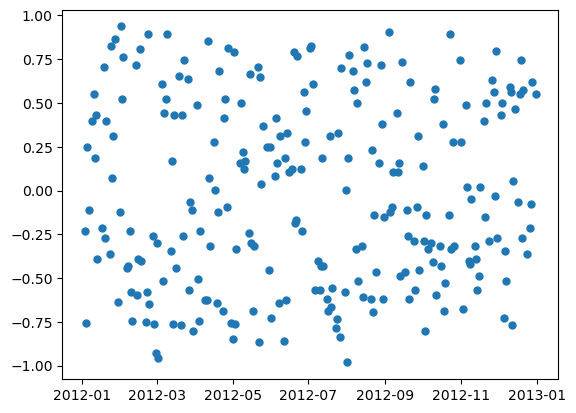

In [65]:
r = 1

# Xtest_pd = pd.DataFrame(Xtest, index = X_test_df.index)
# Xtest_pd.head(10)
# Xtest_pd[r].plot()

Xval_pd = pd.DataFrame(Xval, index = X_val_df.index)
Xval_pd.head(10)
plt.plot(Xval_pd[r], 'o', markersize=5) 

# Xtrain_pd = pd.DataFrame(Xtrain, index = X_train_df.index)
# Xtrain_pd.head(10)
# Xtrain_pd[r].plot()

# X_df[r].plot()


<Axes: >

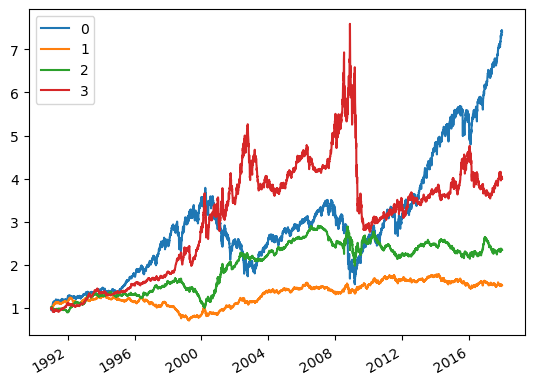

In [66]:
Factors = X_df.iloc[:, :4]
Factors.shape
(1 + Factors).cumprod().plot()

# Features

- Mkt-Rf: the market-cap weighted return of US equities minus risk-free rate
- SMB: the return of a portfolio that is long small stocks and short big stocks,
- HML: the return of a portfolio that is long value stocks and short growth stocks
- Momentum: the return of a portfolio that is long high momentum stocks and Short low (or negative) momentum stocks
- TNX: 10-year treasury bond yield
- VIX: CBOE volatility index, market-derived measure of expected 30-day volatility in the US stock market
- VOL: volatility, sum of all 18 factors in the factors

each quantile transformed and mapped into [−1, 1]


# 1/N portfolio & mean-variance portfolio
+ All risky assets


the max value is -10.438
0.05750590493061706
1.3944081245037347
6.206046141607001
6993.602240485129
cer of 1/N in test is -17477.799555071215


/var/folders/k5/yd970r0n4z3137g3zxnwm9sr0000gn/T/ipykernel_66718/3032812609.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_N_return_test['one_N_return'] = 100 * one_N_return_test['one_N_return']


,one_N_return,5D,20D,60D
2013-01-02,264.6,0.5672,0.25260,0.049683
2013-01-03,-9.7,0.6432,0.24985,0.035017
2013-01-04,63.3,0.8004,0.26930,0.047133
2013-01-07,-29.7,0.9442,0.23850,0.048317
2013-01-08,-31.6,0.5138,0.20800,0.060017
2013-01-09,29.9,0.0444,0.21285,0.074483
2013-01-10,66.4,0.1966,0.20860,0.081483
2013-01-11,1.9,0.0738,0.20975,0.088117
2013-01-14,0.5,0.1342,0.23880,0.074800
2013-01-15,27.4,0.2522,0.26685,0.061417


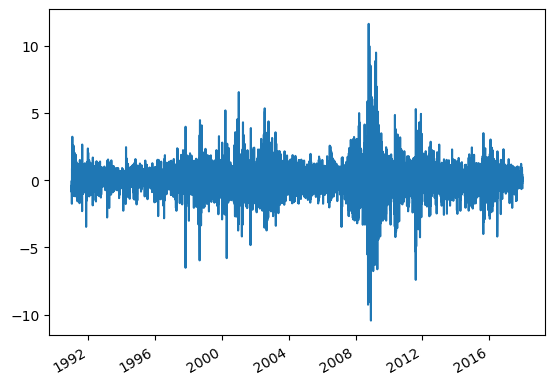

In [214]:
returns = pd.read_csv("data/10_Portfolios_mom.csv", parse_dates = [0], index_col = 0)
returns.head(10)

returns.index = pd.to_datetime(returns.index, format = '%Y%m%d')

row_num = returns.shape[1]
w = np.full(row_num, np.double(1. / row_num))

one_N = []
for date in returns.index:
    one_N.append([
        np.dot(w, returns.loc[date].values)
    ])

one_N = pd.DataFrame(one_N, index = returns.index, columns = ['one_N_excess_return'])

risk_free = pd.read_csv("data/risk-free_rate.csv", parse_dates = [0], index_col = 0)
risk_free = risk_free['RF'].to_frame()

risk_free.index = pd.to_datetime(risk_free.index, format = '%Y%m%d')

risk_free = risk_free[~risk_free.isna().any(axis = 1)]

# set the factors dataframe the same size as the input
risk_free = risk_free[risk_free.index.isin(one_N.index)]

one_N_return = risk_free['RF'] + one_N['one_N_excess_return']

one_N_return = pd.DataFrame(one_N_return, index = returns.index, columns = ['one_N_return'])

# use 5 day trailing averages of VIX (which correspond to one week)
one_N_return["5D"] = one_N_return["one_N_return"].rolling(5).mean() 
# use 20 day trailing averages of VIX (which correspond to one month)
one_N_return["20D"] = one_N_return["one_N_return"].rolling(20).mean() 
# use 60 day trailing averages of VIX (which correspond to one quarter)
one_N_return["60D"] = one_N_return["one_N_return"].rolling(60).mean()

one_N_return = one_N_return[one_N_return.index.isin(X_df.index)]

# one_N_return['one_N_return'][-300:-200].plot()

# factors_test
one_N_return_test = one_N_return[one_N_return.index.isin(factors_test.index)]


one_N_mean = one_N_return['one_N_return'].mean()
one_N_var = one_N_return['one_N_return'].var()

max = one_N_return['one_N_return'].min()
print(f"the max value is {max}")

one_N_return_test['one_N_return'] = 100 * one_N_return_test['one_N_return']

one_N_test_mean = one_N_return_test['one_N_return'].mean()
one_N_test_var = one_N_return_test['one_N_return'].var()

print(one_N_mean)
print(one_N_var)

print(one_N_test_mean)
print(one_N_test_var)

# certainty equivalent return
def cer(mean, var, gamma = 5):
    cer_1_N = mean - (gamma / 2) * var
    return cer_1_N

cer_1_N_test = cer(one_N_test_mean, one_N_test_var)
print(f"cer of 1/N in test is {cer_1_N_test}")

one_N_return["one_N_return"].plot()

risk_free = risk_free[risk_free.index.isin(returns.index)]

one_N_return_test.head(30)

# returns.index.duplicated().any()
# X_df.index.duplicated().any()

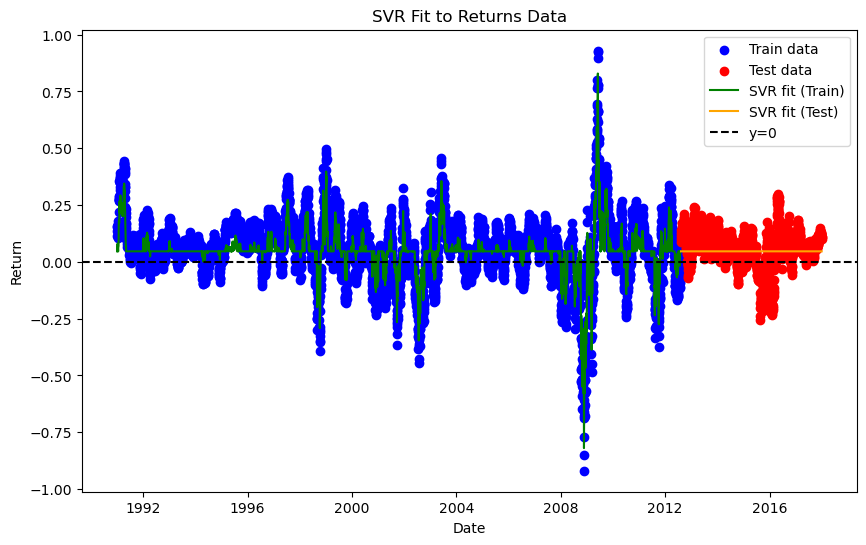

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df is your pandas DataFrame with datetime index and 'one_N_return' column

# Prepare data
X = np.array(one_N_return.index).reshape(-1, 1)  # Reshape datetime index to 2D array
y = one_N_return['60D'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)

# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Fit the model
svr.fit(X_train, y_train)

# Make predictions
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_train, y_pred_train, color='green', label='SVR fit (Train)')
plt.plot(X_test, y_pred_test, color='orange', label='SVR fit (Test)')
plt.axhline(y=0, color='black', linestyle='--', label='y=0') 
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('SVR Fit to Returns Data')
plt.legend()
plt.show()


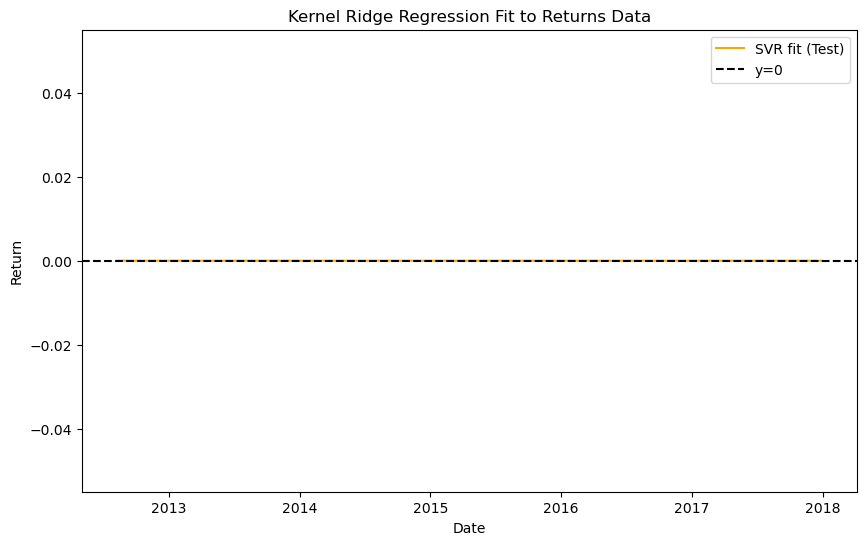

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df is your pandas DataFrame with datetime index and 'one_N_return' column

# Prepare data
X = np.array(one_N_return.index).reshape(-1, 1)  # Reshape datetime index to 2D array
y = one_N_return['one_N_return'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create Kernel Ridge Regression model
krr = KernelRidge(alpha=1.0, kernel='rbf')

# Fit the model
krr.fit(X_train, y_train)

# Make predictions
y_pred_train = krr.predict(X_train)
y_pred_test = krr.predict(X_test)

# Plot results
plt.figure(figsize=(10, 6))
# plt.scatter(X_train, y_train, color='blue', label='Train data')
# plt.scatter(X_test, y_test, color='red', label='Test data')
# plt.plot(X_train, y_pred_train, color='green', label='SVR fit (Train)')
plt.plot(X_test, y_pred_test, color='orange', label='SVR fit (Test)')
plt.axhline(y=0, color='black', linestyle='--', label='y=0') 
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Kernel Ridge Regression Fit to Returns Data')
plt.legend()
plt.show()


# How is the data pre-processed in the meta-learning
# Their dataset
- Alpha158 : CSI 300 data
- Alpha360 : China's A share stock

In [28]:
# M = 240 days 
# gamma = 5








